# import package and set read path

In [1]:
import sys
import scanpy as sc 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
np.random.seed(1) 
random.seed(1) 
import os

os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/")
from scDML.metrics import evaluate_dataset
from scDML.utils import ari # sklearn bug,not using sklearn.cluster.metrics

####################################################
dataset="heart_140"
ncelltype=13
####################################################
read_dir="../evaluation/"+dataset+"/"
save_dir="../evaluation/"+dataset+"/"
os.chdir("/DATA2/zhangjingxiao/yxk/scDML_project/evaluation/")

# Raw

evaluation file exists,dont't need rerun


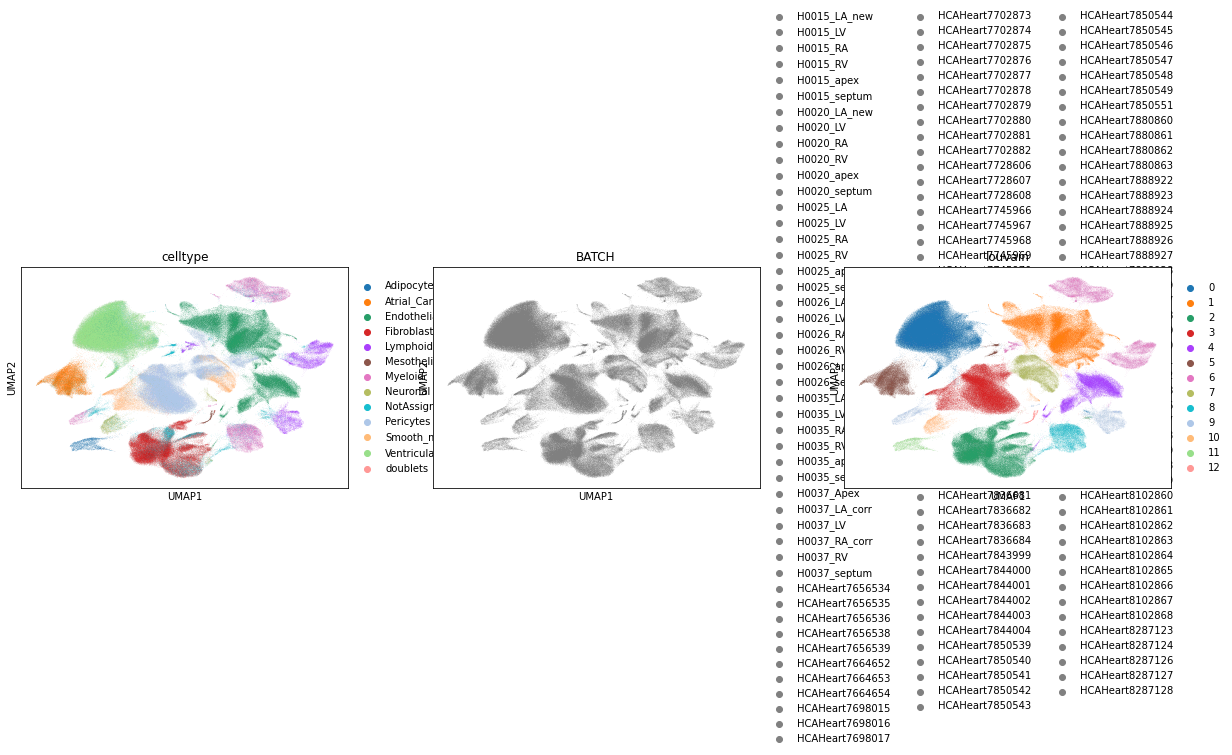

                   Raw
ARI              0.761
NMI              0.775
ASW_label        0.584
ASW_label/batch  0.810
BatchKL          3.345
cLISI            1.032
iLISI            4.931


In [2]:
method="Raw"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Raw_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Raw_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_raw.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    adata_raw=sc.AnnData(adata_integrated.obsm["X_pca"])
    adata_raw.obs=adata_integrated.obs.copy()

    adata_integrated=adata_raw.copy()
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    #adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()

    adata_integrated,Raw_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()
    Raw_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Raw_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# scDML(reassign)

evaluation file exists,dont't need rerun


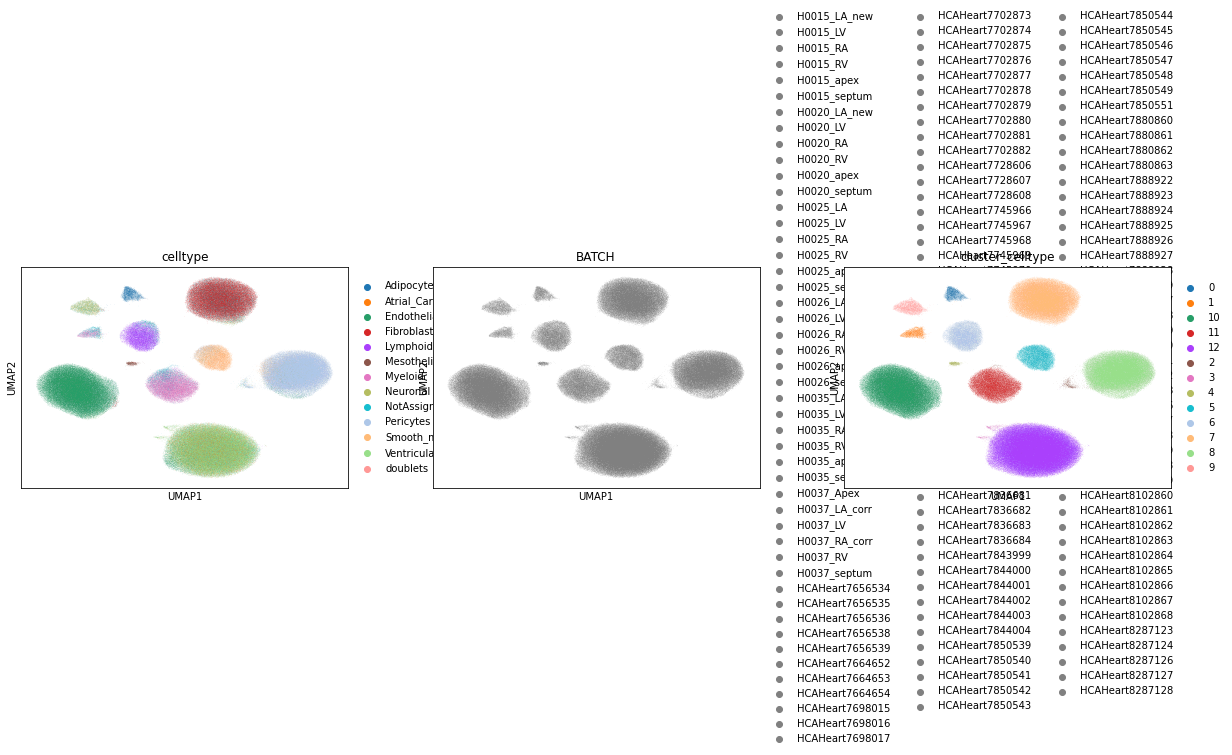

                scDML(reassign)
ARI                       0.764
NMI                       0.788
ASW_label                    --
ASW_label/batch              --
BatchKL                      --
cLISI                        --
iLISI                        --


In [3]:
method="scDML"
# scDML_script.py have been calculate umap!!!!
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","cluster_celltype"])        
    scDML_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
    print(scDML_reassign)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    from sklearn.metrics.cluster import normalized_mutual_info_score
    ARI= ari(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["cluster_celltype"].astype(str))
    print("ARI={}".format(ARI))
    print("NMI={}".format(NMI))
    results = {
    'ARI': np.round(ARI,3),
    'NMI': np.round(NMI,3),
    'ASW_label': "--",
    'ASW_label/batch': "--",
    #'kBET': kBET_value[0],
     'BatchKL':"--",
     'cLISI':"--",  
     'iLISI':"--"
    }
    print("....................................... calculate all metric done .................................")
    scDML_reassign= pd.DataFrame.from_dict(results, orient='index')
    scDML_reassign.columns=[method+"(reassign)"]
    scDML_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")
    #scDML_reassign

# scDML(louvain)

evaluation file exists,dont't need rerun


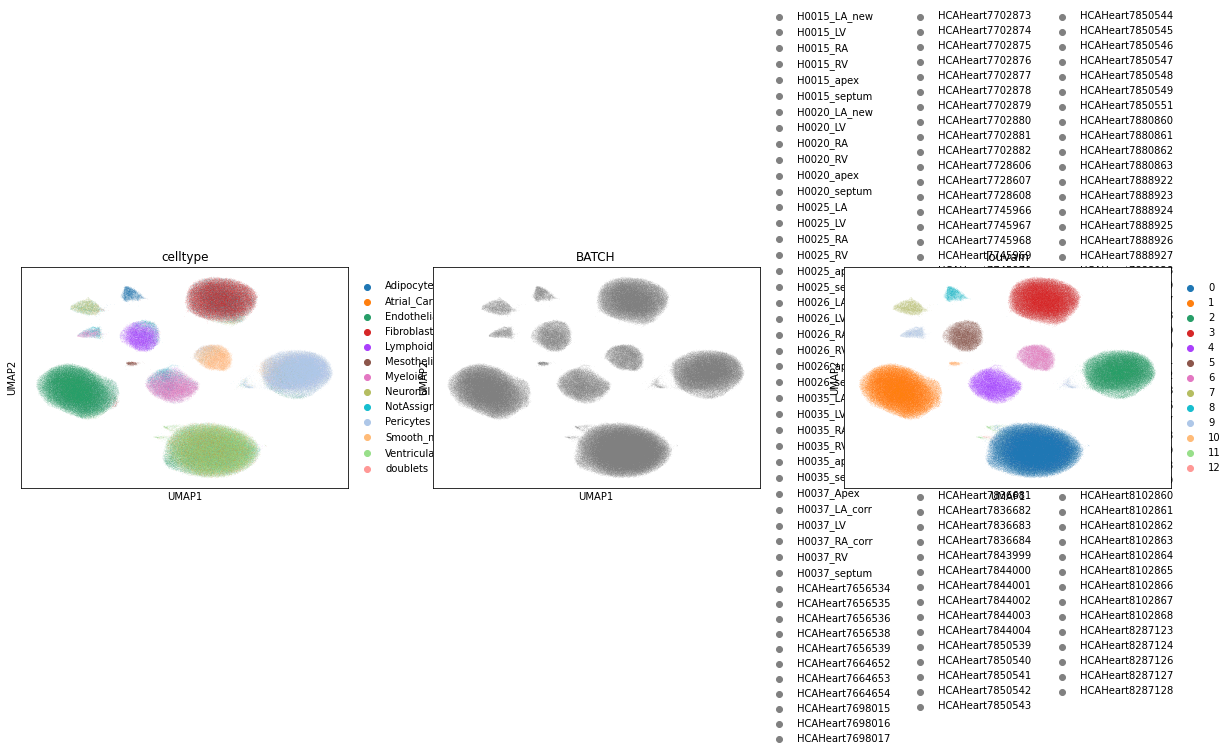

                 scDML(louvain)
ARI                       0.763
NMI                       0.787
ASW_label                 0.647
ASW_label/batch           0.771
BatchKL                   1.777
cLISI                     1.178
iLISI                     9.175


In [4]:
method="scDML"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scDML3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
    print(scDML3_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)

    adata_scDML=sc.AnnData(adata_integrated.obsm["X_emb"])
    adata_scDML.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scDML.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,scDML3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scDML3_eva.columns=[method+"(louvain)"] ## modify column names
    scDML3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
    print(scDML3_eva)

    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# fastMNN

evaluation file exists,dont't need rerun


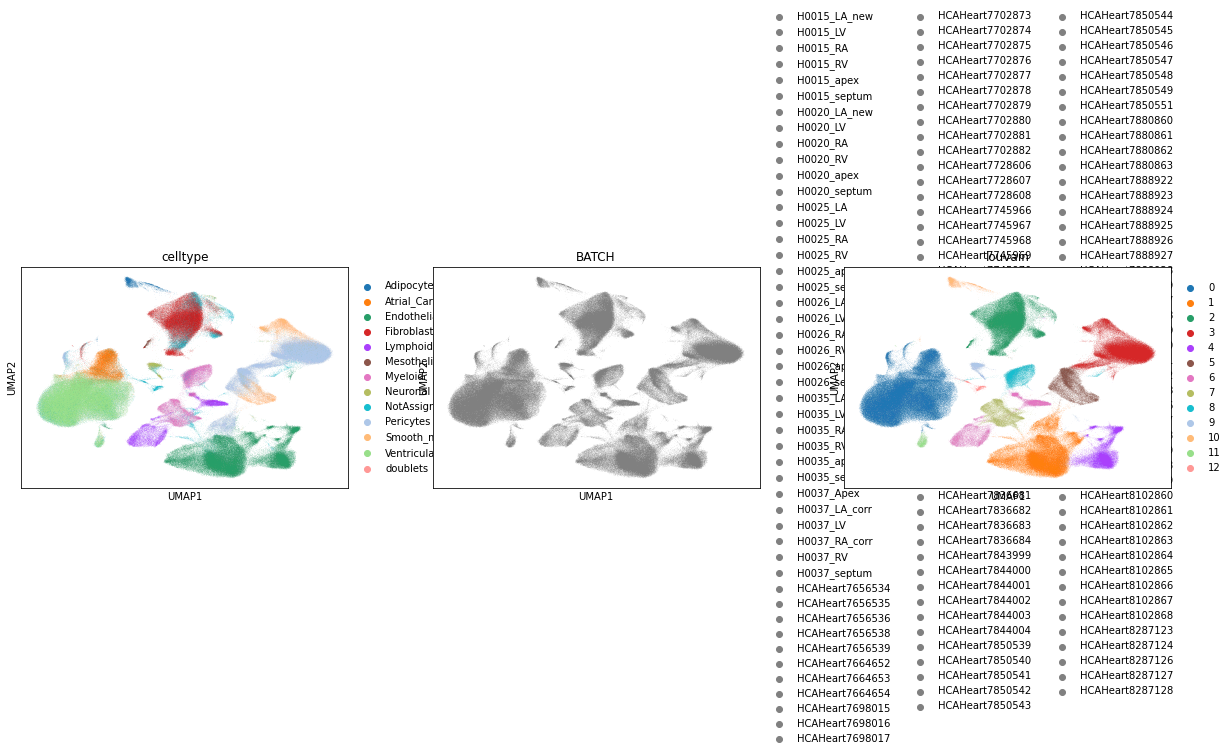

                 fastMNN
ARI                0.661
NMI                0.730
ASW_label          0.583
ASW_label/batch    0.846
BatchKL            2.928
cLISI              1.017
iLISI              6.040


In [5]:
method="fastMNN"

if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    fastMNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(fastMNN_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

    adata_fastMNN=sc.read_h5ad(args_integrated)
    print(adata_fastMNN)

    adata_mnn=sc.AnnData(adata_fastMNN.obsm["X_mnn"])
    adata_mnn.obs=adata_fastMNN.obs.copy()
#     print(adata_mnn)
#     sc.tl.pca(adata_mnn)
#     sc.pp.neighbors(adata_mnn)
#     sc.tl.umap(adata_mnn)
#     sc.pl.umap(adata_mnn,color=["BATCH","celltype"])
    #######################################################
    adata_integrated=adata_mnn.copy()
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,fastMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    fastMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(fastMNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# harmony

evaluation file exists,dont't need rerun


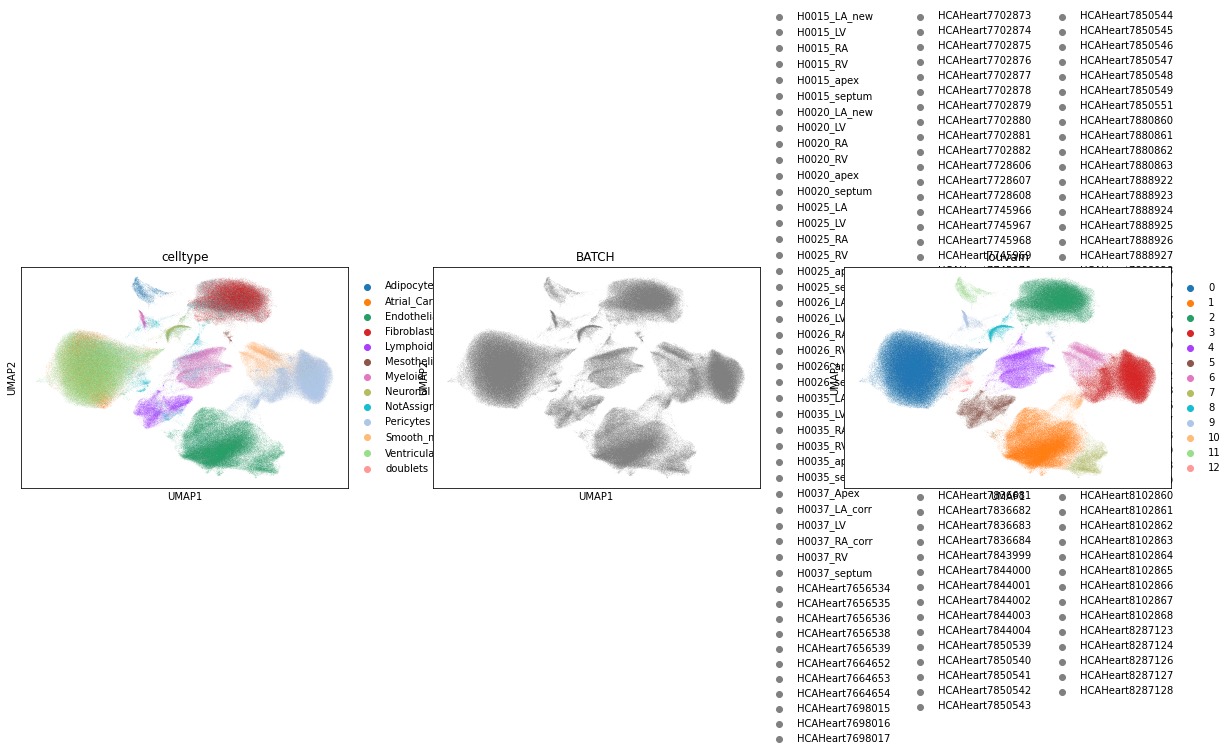

                 harmony
ARI                0.761
NMI                0.792
ASW_label          0.593
ASW_label/batch    0.775
BatchKL            2.019
cLISI              1.050
iLISI              8.354


In [6]:
method="harmony"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    harmony_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(harmony_eva)
    
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_harmony=sc.AnnData(adata_integrated.obsm["X_harmony"])
    adata_harmony.obs=adata_integrated.obs.copy()
    print(adata_harmony)
#     sc.tl.pca(adata_harmony)
#     sc.pp.neighbors(adata_harmony)
#     sc.tl.umap(adata_harmony)
#     sc.pl.umap(adata_harmony,color=["BATCH","celltype"])#

    adata_integrated=adata_harmony.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,harmony_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    harmony_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(harmony_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

In [7]:
# ###################################################################
# method="Seurat3"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
#     adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
#     sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
#     Seurat3_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
#     print(Seurat3_eva)
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)
#     sc.tl.pca(adata_integrated)
# #     print("================================Visulizing the embedding data================================")
# #     sc.pp.neighbors(adata_integrated)
# #     sc.tl.umap(adata_integrated)
# #     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])

#     adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
#     adata_integrated,Seurat3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
#     fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#     sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#     sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#     sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#     plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#     plt.show()

#     Seurat3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#     print(Seurat3_eva)

#     adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
#     adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Scanorama

evaluation file exists,dont't need rerun


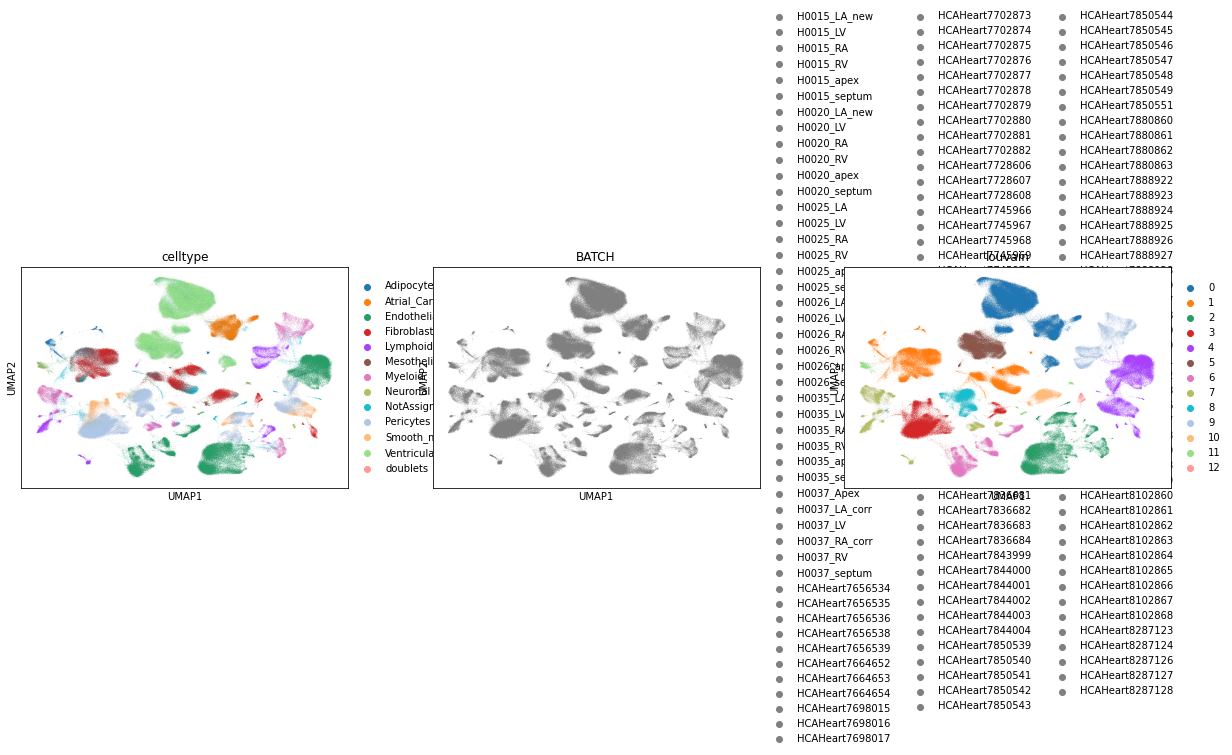

                 Scanorama
ARI                  0.453
NMI                  0.608
ASW_label            0.539
ASW_label/batch      0.915
BatchKL              3.829
cLISI                1.046
iLISI                4.129


In [8]:
###################################################################
method="Scanorama"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    Scanorama_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(Scanorama_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    #print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    
    adata_scanorama=sc.AnnData(adata_integrated.obsm["X_scanorama"])
    adata_scanorama.obs=adata_integrated.obs.copy()
    adata_integrated=adata_scanorama.copy() #
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,Scanorama_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")

    plt.show()

    Scanorama_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(Scanorama_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# INSCT

evaluation file exists,dont't need rerun


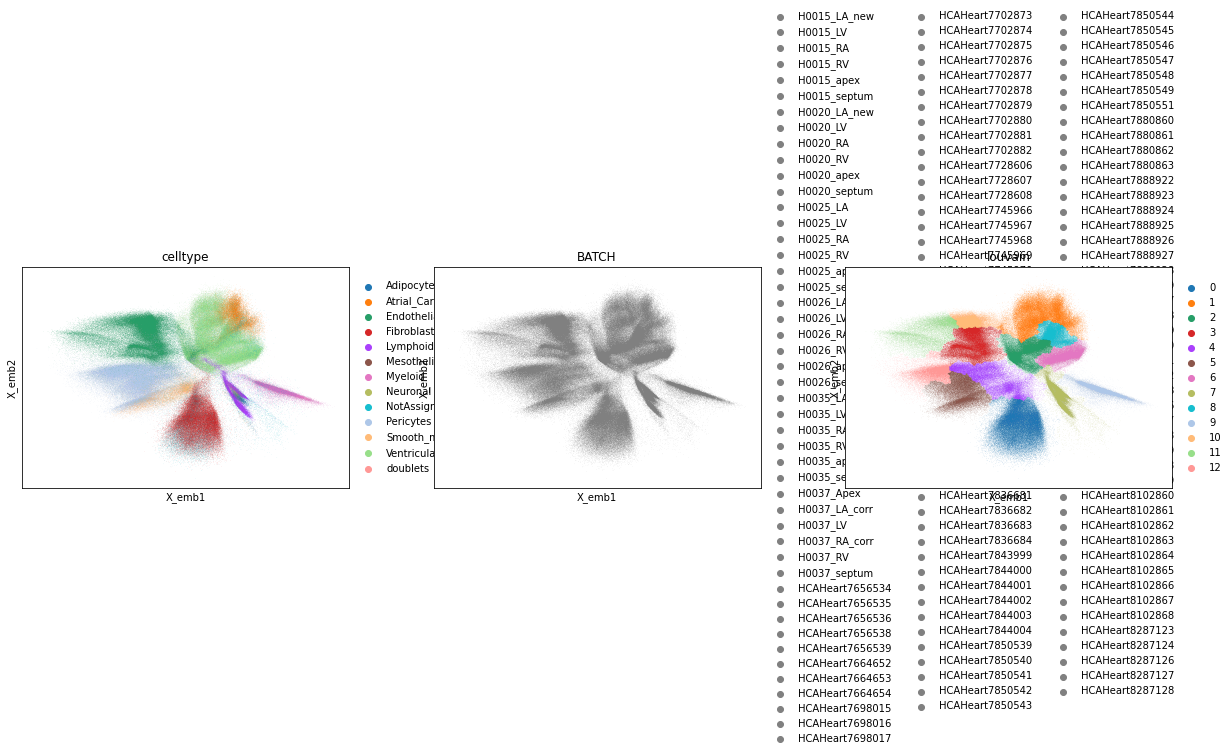

                  INSCT
ARI               0.391
NMI               0.599
ASW_label         0.566
ASW_label/batch   0.509
BatchKL           1.893
cLISI             1.238
iLISI            11.598


In [9]:
method="INSCT"
## use emb
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    INSCT_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(INSCT_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,INSCT_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    INSCT_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(INSCT_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# BBKNN

evaluation file exists,dont't need rerun


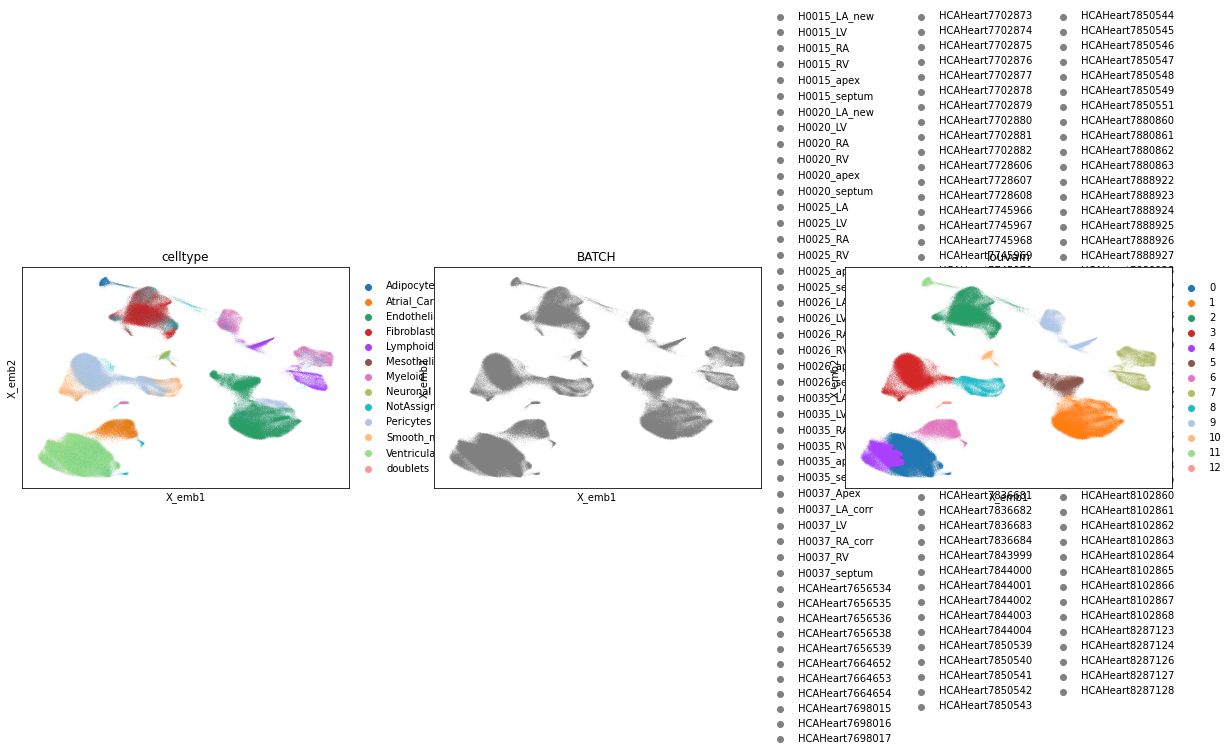

                 BBKNN
ARI              0.619
NMI              0.734
ASW_label        0.629
ASW_label/batch  0.529
BatchKL          2.682
cLISI            1.085
iLISI            8.694


In [10]:
method="BBKNN"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.embedding(adata_evaluated,basis="X_emb",color=["celltype","BATCH","louvain"])    
    BBKNN_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(BBKNN_eva)  
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,BBKNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.embedding(adata_integrated,basis="emb",color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.embedding(adata_integrated,basis="emb",color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.embedding(adata_integrated,basis="emb",color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    BBKNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(BBKNN_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# Liger

evaluation file exists,dont't need rerun


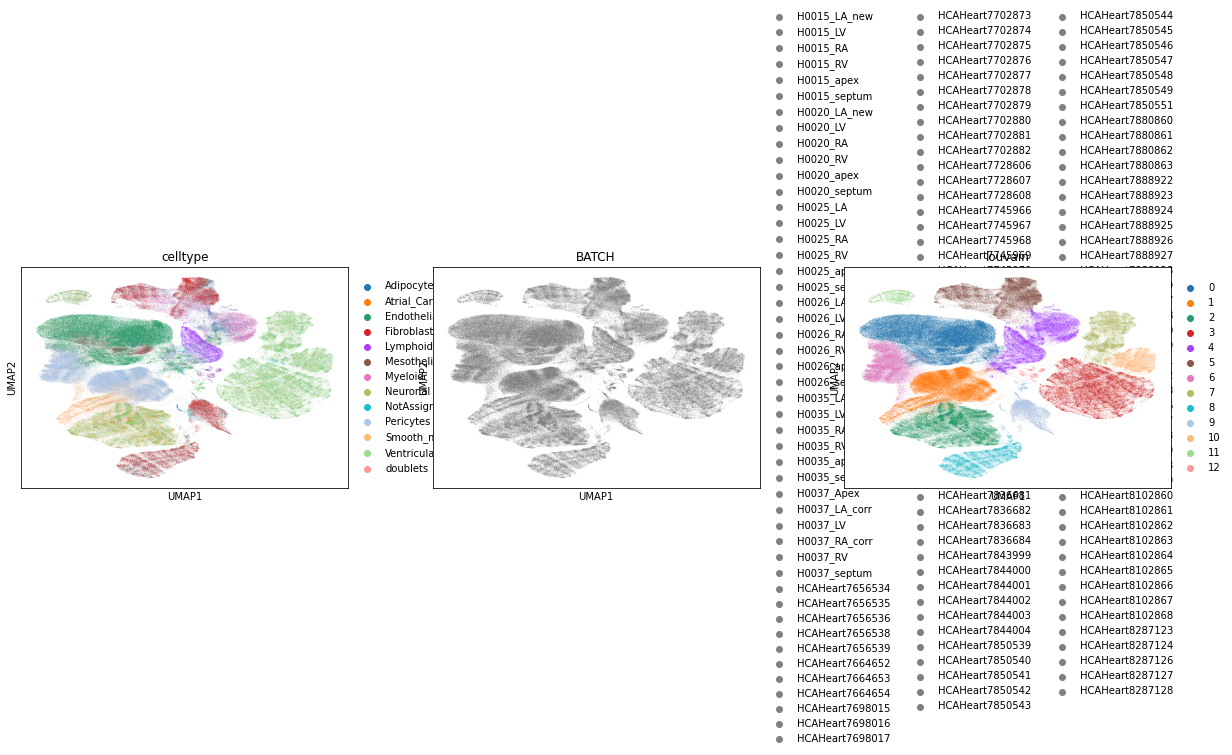

                  liger
ARI               0.420
NMI               0.509
ASW_label         0.526
ASW_label/batch   0.692
BatchKL           1.557
cLISI             1.268
iLISI            10.242


In [11]:
method="liger"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    liger_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(liger_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
    adata_liger=sc.AnnData(adata_integrated.obsm["X_iNMF"])
    adata_liger.obs=adata_integrated.obs.copy()
    print(adata_liger)
    sc.tl.pca(adata_liger)
    sc.pp.neighbors(adata_liger)
    sc.tl.umap(adata_liger)
    sc.pl.umap(adata_liger,color=["BATCH","celltype"])

    adata_integrated=adata_liger.copy()

    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()

    adata_integrated,liger_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)
    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    liger_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(liger_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

In [12]:
# method="BERMUDA"

# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
#     adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
#     sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
#     bermuda_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
#     print(bermuda_eva)
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
#     if(os.path.exists(args_integrated)):
#         print(args_integrated)
#         adata_integrated=sc.read_h5ad(args_integrated)
#         print(adata_integrated)
#         print("================================Visulizing the embedding data================================")
#         sc.tl.pca(adata_integrated)
#         sc.pp.neighbors(adata_integrated)
#         sc.tl.umap(adata_integrated)
#         sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
#         adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
#         adata_integrated,bermuda_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#         fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#         sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#         sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#         sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#         plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#         plt.show()
#         bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#         print(bermuda_eva)
#         adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
#     else:
#         fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#         plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#         plt.show()    
#         results = {
#         'ARI': "--",
#         'NMI': "--",
#         'ASW_label': "--",
#         'ASW_label/batch': "--",
#         #'kBET': kBET_value[0],
#          'BatchKL':"--",
#          'cLISI':"--",  
#          'iLISI':"--"
#         }
#         print("....................................... calculate all metric done .................................")
#         bermuda_eva = pd.DataFrame.from_dict(results, orient='index')
#         bermuda_eva.columns=[method]
#         bermuda_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#         bermuda_eva

# scVI

evaluation file exists,dont't need rerun


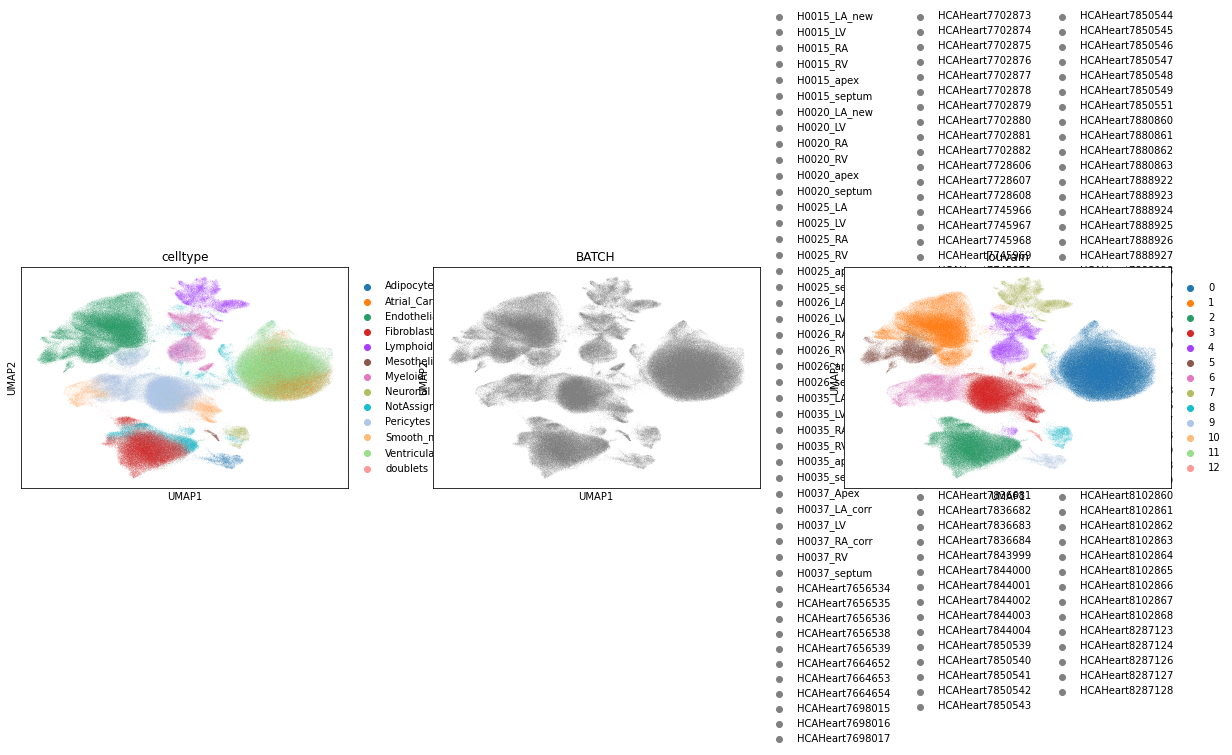

                  scVI
ARI              0.682
NMI              0.753
ASW_label        0.568
ASW_label/batch  0.804
BatchKL          3.010
cLISI            1.022
iLISI            5.640


In [13]:
method="scVI"
if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
    print("evaluation file exists,dont't need rerun")
    adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
    sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
    scVI_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
    print(scVI_eva)
else:
    args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
    adata_integrated=sc.read_h5ad(args_integrated)
    print(adata_integrated)
    print("================================Visulizing the embedding data================================")
#     sc.tl.pca(adata_integrated)
#     sc.pp.neighbors(adata_integrated)
#     sc.tl.umap(adata_integrated)
#     sc.pl.umap(adata_integrated,color=["BATCH","celltype"])#
    adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()
    adata_integrated,scVI_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

    fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
    sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
    sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
    sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
    plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
    plt.show()

    scVI_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
    print(scVI_eva)
    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

In [14]:
# method="carDEC"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
#     adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
#     sc.pl.umap(adata_evaluated,color=["celltype","BATCH","reassign_label"])    
#     carDEC_reassign=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
#     print(carDEC_reassign)
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)
#     from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
#     ARI= adjusted_rand_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
#     NMI= normalized_mutual_info_score(adata_integrated.obs["celltype"].astype(str), adata_integrated.obs["reassign_label"].astype(str))
#     print("ARI={}".format(ARI))
#     print("NMI={}".format(NMI))
#     results = {
#     'ARI': np.round(ARI,3),
#     'NMI': np.round(NMI,3),
#     'ASW_label': "--",
#     'ASW_label/batch': "--",
#     #'kBET': kBET_value[0],
#      'BatchKL':"--",
#      'cLISI':"--",  
#      'iLISI':"--"
#     }
#     print("....................................... calculate all metric done .................................")
#     carDEC_reassign= pd.DataFrame.from_dict(results, orient='index')
#     carDEC_reassign.columns=[method+"(reassign)"]
#     carDEC_reassign.to_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv")

In [15]:
# method="carDEC"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
    
#     adata_evaluated=sc.read(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")
#     sc.pl.umap(adata_evaluated,color=["celltype","BATCH","louvain"])    
#     carDEC_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
#     print(carDEC_eva)
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"
#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)

#     adata_integrated.obsm["X_emb"]=adata_integrated.X.copy()## add X_emb
#     adata_integrated,carDEC3_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

# #     sc.tl.pca(adata_integrated)
# #     sc.pp.neighbors(adata_integrated)
# #     sc.tl.umap(adata_integrated)
# #     sc.pl.umap(adata_integrated,color=["BATCH","celltype","louvain"])#
#     fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#     sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#     sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#     sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#     plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#     plt.show()

#     carDEC3_eva.columns=[method+"(louvain)"] ## modify column names
#     carDEC3_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv")
#     print(carDEC3_eva)

#     adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

In [16]:
# method="iSMNN"
# if(os.path.exists(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")):
#     print("evaluation file exists,dont't need rerun")
# else:
#     args_integrated=read_dir+method+"/"+dataset+"_"+method+"_corrected.h5ad"

#     adata_integrated=sc.read_h5ad(args_integrated)
#     print(adata_integrated)
#     adata_integrated.obs["celltype"]=adata_integrated.obs["cell.anno"].copy()
#     adata_integrated.obs["BATCH"]=adata_integrated.obs["batch_id"].copy()
#     adata_integrated.obsm["X_emb"]=adata_integrated.obsm["X_pca"].copy()
#     adata_integrated,iSMNN_eva=evaluate_dataset(adata_integrated,method=method,n_celltype=ncelltype)

#     fig, axs = plt.subplots(1, 3, figsize=(18,5),constrained_layout=True)
#     sc.pl.umap(adata_integrated, color="celltype", title="celltype", ax=axs[0], show=False)#
#     sc.pl.umap(adata_integrated, color="BATCH", title="BATCH", ax=axs[1], show=False)##
#     sc.pl.umap(adata_integrated, color="louvain", title="louvain", ax=axs[2], show=False)##
#     plt.savefig(read_dir+method+"/"+dataset+"_"+method+"_scanpy_vis.png")
#     plt.show()

#     iSMNN_eva.to_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv")
#     print(iSMNN_eva)
#     adata_integrated.__dict__['_raw'].__dict__['_var'] = adata_integrated.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
#    adata_integrated.write_h5ad(save_dir+method+"/"+dataset+"_"+method+"_evaluated.h5ad")

# summary evaluation of all method to  table

In [17]:

method_list=["Raw","scDML","fastMNN","harmony","Scanorama","INSCT","BBKNN","liger","scVI"]

df_ls=[]
for method in method_list:
    #print(method)
    if(method=="scDML" or method=="carDEC"):
        method_eva1=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(reassign)_evaluation.csv",index_col=0)
        df_ls.append(method_eva1)
        method_eva2=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"(louvain)_evaluation.csv",index_col=0)
        df_ls.append(method_eva2)
    else:
        method_eva=pd.read_csv(save_dir+method+"/"+dataset+"_"+method+"_evaluation.csv",index_col=0)
        df_ls.append(method_eva)

result = pd.concat(df_ls, join='outer', axis=1)
result.columns=["Raw","scDML(reassign)","scDML(louvain)"]+method_list[2:]
result.index.name=dataset ## add title for column names 
#result=result.round(3) ## only save 3 precision of float
result.to_csv(save_dir+dataset+"_evaluation.csv")
result

,Raw,scDML(reassign),scDML(louvain),fastMNN,harmony,Scanorama,INSCT,BBKNN,liger,scVI
heart_140,,,,,,,,,,
ARI,0.761,0.764,0.763,0.661,0.761,0.453,0.391,0.619,0.420,0.682
NMI,0.775,0.788,0.787,0.730,0.792,0.608,0.599,0.734,0.509,0.753
ASW_label,0.584,--,0.647,0.583,0.593,0.539,0.566,0.629,0.526,0.568
ASW_label/batch,0.810,--,0.771,0.846,0.775,0.915,0.509,0.529,0.692,0.804
BatchKL,3.345,--,1.777,2.928,2.019,3.829,1.893,2.682,1.557,3.010
cLISI,1.032,--,1.178,1.017,1.050,1.046,1.238,1.085,1.268,1.022
iLISI,4.931,--,9.175,6.040,8.354,4.129,11.598,8.694,10.242,5.640
